In [1]:
import pandas as pd
import numpy as np

In [2]:
! ls 

MMI_analysis-Copy1.ipynb
MMI_analysis.ipynb
README.md
alpha.ipynb
beta.ipynb
differential_abundance_higher_taxonomic_levels.ipynb
differential_abundance_species.ipynb
differential_prevalence.ipynb
gbs_cohort_metadata_2024-06-20.txt
gbs_cohort_taxonomy_raw_counts_2024-06-20.txt
humann3.ipynb
humann_genefamilies_clean.tsv
humann_pathabundance_clean.tsv
permanova.ipynb
permanova_clr_transformed.csv
permanova_metadata.csv
uniprotkb_keyword_Antibiotic_resistance_2024_07_31.tsv
uniprotkb_scfa_2024_07_31.tsv.gz


In [3]:
meta = pd.read_csv("gbs_cohort_metadata_2024-06-20.txt", sep="\t", index_col=1)
meta

,magic_id,time_cat,del_method,matabx_expo_cat,dist_tp,Date_Collected,Time_Collected,Timeline_Weeks,Abx_regular,Abx_timeline.prior..during..after.,...,parity_n,laboronset_type,multip_yn,rom_hr,sepsisrisk,gbs_result,motherrace,motherethnicity,maternalheight,weight_prepregnancy_2
sample_id,,,,,,,,,,,,,,,,,,,,,
magic.0022,101,1,Vaginal,No antibiotics,NaN,NaN,NaN,3,regular,NaN,...,2,Induced,No,4.10,0.10,Negative,White,Non-Hispanic,167.6,125.0
magic.1142,101,12,Vaginal,No antibiotics,0.11,2017-12-11,1330,48,regular,NaN,...,2,Induced,No,4.10,0.10,Negative,White,Non-Hispanic,167.6,125.0
magic.0519,101,6,Vaginal,No antibiotics,0.09,2017-06-11,NaN,24,regular,NaN,...,2,Induced,No,4.10,0.10,Negative,White,Non-Hispanic,167.6,125.0
magic.0051,102,1,Vaginal,No antibiotics,0.01,2017-01-11,2130,4,regular,NaN,...,1,Spontaneous,No,3.95,0.14,Negative,White,Non-Hispanic,177.8,165.0
magic.1120,102,12,Vaginal,No antibiotics,0.01,2017-12-12,NaN,48,regular,NaN,...,1,Spontaneous,No,3.95,0.14,Negative,White,Non-Hispanic,177.8,165.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
magic.5263,599,0,Vaginal,No antibiotics,0.26,2019-09-18,2000,1,regular,NaN,...,1,Induced,No,28.17,0.28,Negative,Asian,Unknown / Not Reported,161.3,125.0
magic.5187,601,0,C-section,Other antibiotics,0.23,2019-09-20,2210,1,regular,NaN,...,1,NaN,No,0.00,0.03,Negative,White,Non-Hispanic,162.6,145.0
magic.5176,603,0,Vaginal,No antibiotics,0.26,2019-09-25,1025,1,regular,NaN,...,2,Spontaneous,No,4.72,0.14,Negative,White,Non-Hispanic,162.6,135.0


In [4]:
meta.columns

Index(['magic_id', 'time_cat', 'del_method', 'matabx_expo_cat', 'dist_tp',
       'Date_Collected', 'Time_Collected', 'Timeline_Weeks', 'Abx_regular',
       'Abx_timeline.prior..during..after.', 'abx_day', 'Consistency', 'Color',
       'Amount', 'dob', 'babysex', 'gestational_age_wk',
       'gestational_age_days', 'weight1', 'sizeforgestationalage', 'icn',
       'icnabx', 'mat_ageatadm', 'gravidity_n', 'parity_n', 'laboronset_type',
       'multip_yn', 'rom_hr', 'sepsisrisk', 'gbs_result', 'motherrace',
       'motherethnicity', 'maternalheight', 'weight_prepregnancy_2'],
      dtype='object')

In [5]:
species = pd.read_csv("gbs_cohort_taxonomy_raw_counts_2024-06-20.txt", sep="\t", index_col=0)
species = species.div(species.sum(axis=1), axis=0)
species.sum(axis=1)

magic.0022    1.0
magic.1142    1.0
magic.0519    1.0
magic.0051    1.0
magic.1120    1.0
             ... 
magic.5263    1.0
magic.5187    1.0
magic.5176    1.0
magic.5175    1.0
magic.5088    1.0
Length: 1381, dtype: float64

In [6]:
info_df = species.copy()
info_df

,k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Enterococcaceae;g__Enterococcus;s__Enterococcus_faecalis,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Klebsiella;s__Klebsiella_pneumoniae,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Escherichia;s__Escherichia_coli,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Escherichia;s__Escherichia_coli_C,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Escherichia;s__Escherichia_coli_D,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Escherichia;s__Escherichia_flexneri,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Leclercia;s__Leclercia_sp002902985,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Escherichia;s__Escherichia_sp005843885,k__Bacteria;p__Firmicutes;c__Bacilli;o__Staphylococcales;f__Staphylococcaceae;g__Staphylococcus;s__Staphylococcus_epidermidis,k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Streptococcaceae;g__Streptococcus;s__Streptococcus_pseudopneumoniae_O,...,k__Bacteria;p__Firmicutes;c__Bacilli;o__Brevibacillales;f__Brevibacillaceae;g__Brevibacillus;s__Brevibacillus_thermoruber,k__Bacteria;p__Desulfobacterota;c__Desulfobacteria;o__Desulfobacterales;f__Desulfosarcinaceae;g__Desulfatitalea;s__Desulfatitalea_tepidiphila,k__Bacteria;p__Patescibacteria;c__CPR2;o__CG2-30-33-46;f__CG2-30-33-46;g__CG2-30-33-46;s__CG2-30-33-46_sp002792735,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Burkholderiales;f__Gallionellaceae;g__Nitrotoga;s__Nitrotoga_sp002470125,k__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__UBA935;s__UBA935_sp002293525,k__Bacteria;p__Firmicutes;c__Bacilli;o__RFN20;f__CAG-288;g__UBA7642;s__UBA7642_sp900313465,k__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Flavobacteriales;f__Flavobacteriaceae;g__Flavobacterium;s__Flavobacterium_aquidurense_B,k__Bacteria;p__Verrucomicrobiota;c__Verrucomicrobiae;o__Pedosphaerales;f__UBA9464;g__SXXZ01;s__SXXZ01_sp005789375,k__Bacteria;p__Actinobacteriota;c__Actinomycetia;o__Mycobacteriales;f__Mycobacteriaceae;g__Mycobacterium;s__Mycobacterium_saopaulense,k__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__UBA1066;s__UBA1066_sp900319795
magic.0022,0.000148,0.000885,0.253606,0.021287,0.188680,0.283782,0.000000,0.007497,0.000050,7.533709e-07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
magic.1142,0.000110,0.000156,0.002840,0.000214,0.001704,0.000305,0.000006,0.000052,0.000005,3.845485e-06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
magic.0519,0.000285,0.000141,0.041324,0.002529,0.022542,0.030943,0.000041,0.000939,0.000071,9.038960e-06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
magic.0051,0.000358,0.000169,0.000624,0.000040,0.000521,0.000016,0.000445,0.000005,0.002043,4.195292e-05,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
magic.1120,0.000001,0.000059,0.003784,0.000014,0.000183,0.000033,0.000000,0.000002,0.000000,4.380950e-06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
magic.5263,0.003141,0.000016,0.000097,0.000009,0.000038,0.000047,0.000000,0.000000,0.010215,6.215143e-04,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
magic.5187,0.029214,0.778197,0.003233,0.000008,0.001353,0.000072,0.000251,0.000001,0.037842,2.579107e-04,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
magic.5176,0.000005,0.000052,0.191648,0.019389,0.165635,0.250038,0.000000,0.007014,0.001231,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
magic.5175,0.061988,0.004143,0.002520,0.000038,0.000469,0.000149,0.000139,0.000032,0.009560,1.798742e-06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
info_df["time"] = meta["time_cat"]
info_df["gbs"] = meta["matabx_expo_cat"]
info_df = info_df[info_df["gbs"] != "Other antibiotics"]
info_df["gbs"] = info_df["gbs"] == "GBS antibiotics"
info_df

/var/folders/w8/85y9rkfs49x53d7kk_ql70bc0000gn/T/ipykernel_14301/3400671990.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  info_df["gbs"] = info_df["gbs"] == "GBS antibiotics"


,k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Enterococcaceae;g__Enterococcus;s__Enterococcus_faecalis,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Klebsiella;s__Klebsiella_pneumoniae,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Escherichia;s__Escherichia_coli,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Escherichia;s__Escherichia_coli_C,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Escherichia;s__Escherichia_coli_D,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Escherichia;s__Escherichia_flexneri,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Leclercia;s__Leclercia_sp002902985,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Escherichia;s__Escherichia_sp005843885,k__Bacteria;p__Firmicutes;c__Bacilli;o__Staphylococcales;f__Staphylococcaceae;g__Staphylococcus;s__Staphylococcus_epidermidis,k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Streptococcaceae;g__Streptococcus;s__Streptococcus_pseudopneumoniae_O,...,k__Bacteria;p__Patescibacteria;c__CPR2;o__CG2-30-33-46;f__CG2-30-33-46;g__CG2-30-33-46;s__CG2-30-33-46_sp002792735,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Burkholderiales;f__Gallionellaceae;g__Nitrotoga;s__Nitrotoga_sp002470125,k__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__UBA935;s__UBA935_sp002293525,k__Bacteria;p__Firmicutes;c__Bacilli;o__RFN20;f__CAG-288;g__UBA7642;s__UBA7642_sp900313465,k__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Flavobacteriales;f__Flavobacteriaceae;g__Flavobacterium;s__Flavobacterium_aquidurense_B,k__Bacteria;p__Verrucomicrobiota;c__Verrucomicrobiae;o__Pedosphaerales;f__UBA9464;g__SXXZ01;s__SXXZ01_sp005789375,k__Bacteria;p__Actinobacteriota;c__Actinomycetia;o__Mycobacteriales;f__Mycobacteriaceae;g__Mycobacterium;s__Mycobacterium_saopaulense,k__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__UBA1066;s__UBA1066_sp900319795,time,gbs
magic.0022,0.000148,0.000885,0.253606,0.021287,0.188680,0.283782,0.000000,0.007497,0.000050,7.533709e-07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,False
magic.1142,0.000110,0.000156,0.002840,0.000214,0.001704,0.000305,0.000006,0.000052,0.000005,3.845485e-06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12,False
magic.0519,0.000285,0.000141,0.041324,0.002529,0.022542,0.030943,0.000041,0.000939,0.000071,9.038960e-06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6,False
magic.0051,0.000358,0.000169,0.000624,0.000040,0.000521,0.000016,0.000445,0.000005,0.002043,4.195292e-05,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,False
magic.1120,0.000001,0.000059,0.003784,0.000014,0.000183,0.000033,0.000000,0.000002,0.000000,4.380950e-06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
magic.5245,0.004224,0.001113,0.001043,0.000014,0.001576,0.000164,0.000261,0.000007,0.014386,1.509985e-04,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,False
magic.5194,0.004189,0.000139,0.000136,0.000010,0.000062,0.000022,0.000004,0.000003,0.012071,4.445676e-06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,False
magic.5263,0.003141,0.000016,0.000097,0.000009,0.000038,0.000047,0.000000,0.000000,0.010215,6.215143e-04,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,False
magic.5176,0.000005,0.000052,0.191648,0.019389,0.165635,0.250038,0.000000,0.007014,0.001231,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,False


In [10]:
from scipy.stats import ranksums
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
from tqdm import tqdm
# from scipy.stats import false_discovery_control
from scipy.stats import fisher_exact

def get_pvalues(gbs, no_gbs):
    p_info = []
    for i, d in tqdm(enumerate(info_df.columns[:-2])):
#         p = ranksums(gbs[d], no_gbs[d]).pvalue
        threshold = 0.00001
        table = [
            [(gbs[d] > threshold).sum(), (gbs[d] < threshold).sum()], 
            [(no_gbs[d] > threshold).sum(), (no_gbs[d] < threshold).sum()], 
        ]
        p = fisher_exact(table).pvalue
    
        p_info.append({
            "species" : d,
            "p" : p,
        })
        
    p_info_df = pd.DataFrame(p_info)
    
#     p_info_df["q"] = false_discovery_control(p_info_df["p"])
    p_info_df["q"] = p_info_df["p"] * species.shape[1]
    return p_info_df

In [11]:
import math

def analyze_timepoint(timepoint):
    info_df_curr = info_df[info_df["time"] == timepoint]
    gbs = info_df_curr[info_df_curr["gbs"]]
    no_gbs = info_df_curr[~info_df_curr["gbs"]]
    
    p_info_df = get_pvalues(gbs, no_gbs)
    
    significant = p_info_df[p_info_df["q"] < 0.05].set_index("species").sort_values("q")
    
    if significant.shape[0] == 0:
        return p_info_df.sort_values("p")
    
    cols = 4
    rows = math.ceil(significant.shape[0] / cols)

    figs, axs = plt.subplots(rows, cols, figsize=(20, 5 * rows), dpi=200)

    for i, s in enumerate(significant.index):
        if rows > 1:
            ax = axs[i // cols][i % cols]
        else:
            ax = axs[i]
#         ax.boxplot(gbs[s], positions=[0])
#         ax.boxplot(no_gbs[s], positions=[1])
#         ax.scatter(np.random.normal(0, 0.01, len(gbs[s])), gbs[s], c="orange", s=1)
#         ax.scatter(np.random.normal(1, 0.01, len(no_gbs[s])), no_gbs[s], c="orange", s=1)
        ax.bar([0, 1], [(gbs[s] > 0.00001).mean(), (no_gbs[s] > 0.00001).mean()])

        ax.set_ylim((0, 1))
        ax.set_xticks([0, 1], [f"GBS \n(n = {len(gbs[s])})", f"No abx \n(n = {len(no_gbs[s])})"])

        q = significant.loc[s]["q"]
        text = '$q = %s$' % float('%.2g' % q) if q < 0.05 else "n.s."
        ax.text(0.5, 0.9, s.split(";")[-1], horizontalalignment="center", size=12)
        ax.text(0.5, 0.8, text, horizontalalignment="center", size=12)
    plt.show()

0


11141it [00:10, 1024.25it/s]


1


11141it [00:11, 1004.19it/s]


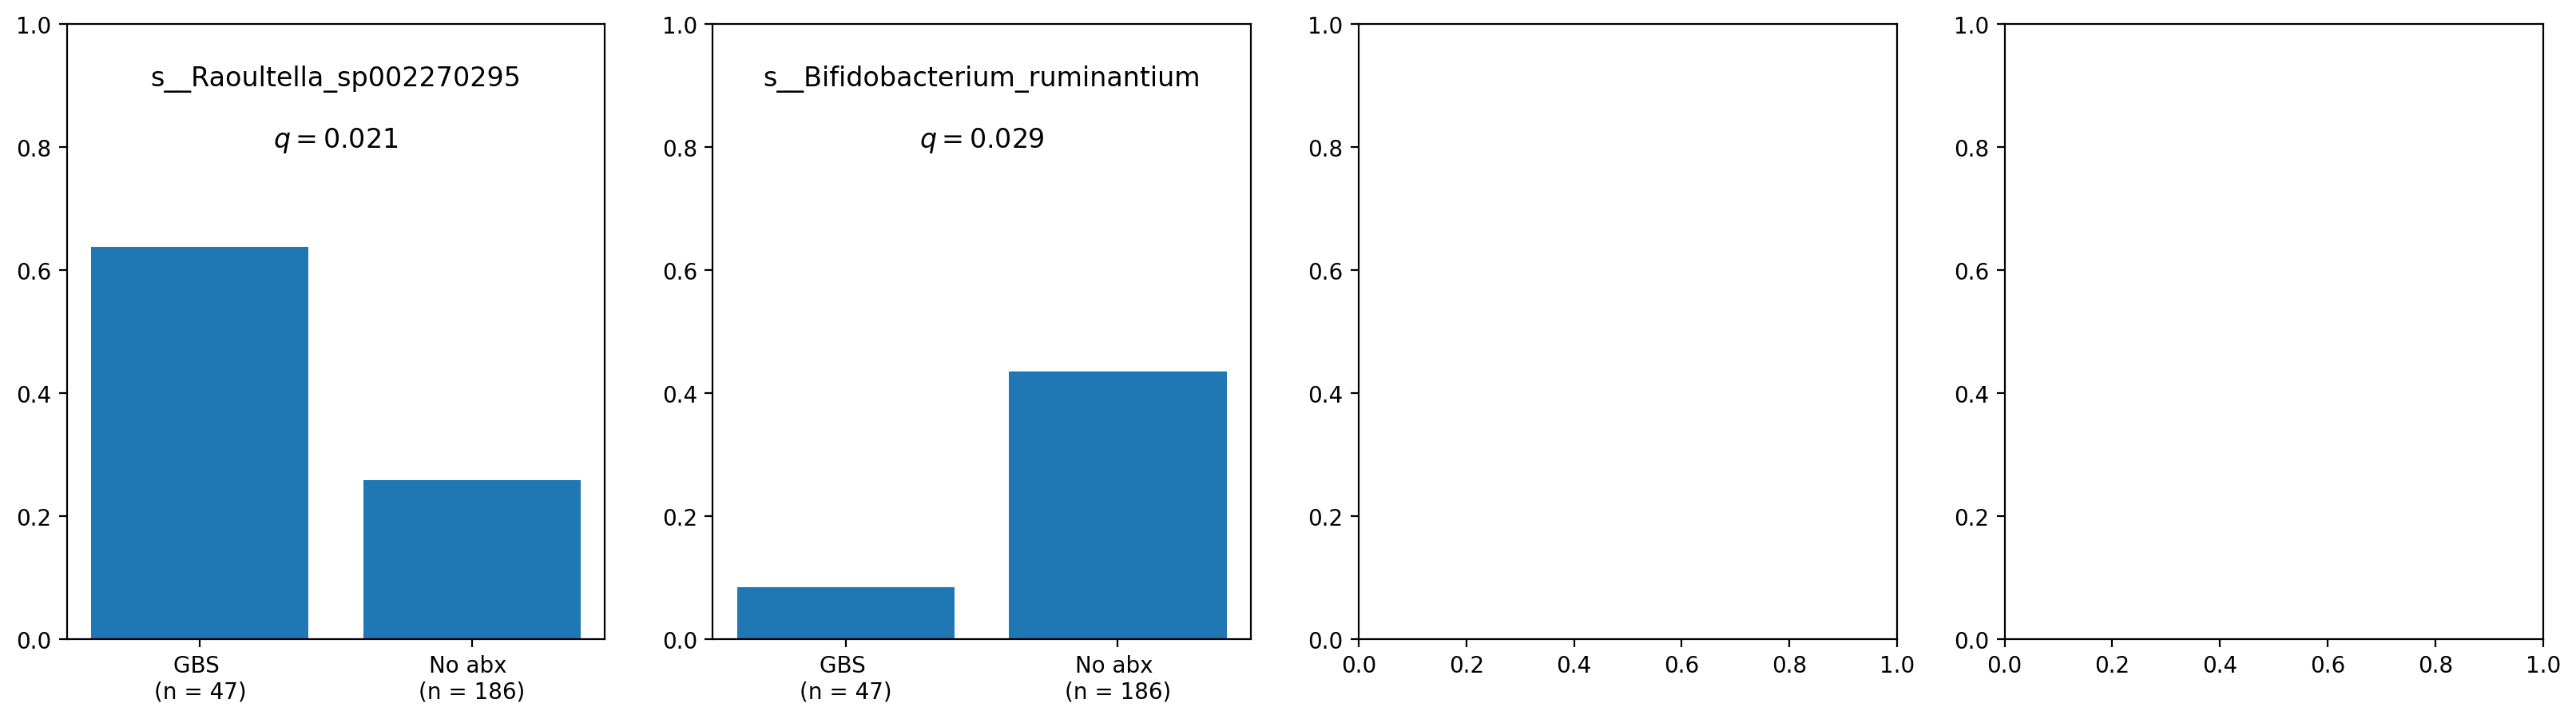

6


11141it [00:12, 859.83it/s] 


12


11141it [00:10, 1018.70it/s]


18


11141it [00:10, 1055.69it/s]


24


11141it [00:10, 1059.65it/s]


In [12]:
for i in [0, 1, 6, 12, 18, 24]:
    print(i)
    analyze_timepoint(i)
# analyze_timepoint(1)